In [28]:
import os
from datetime import date
import pandas as pd
from dateutil.relativedelta import relativedelta
from jugaad_data.nse import index_raw
from jugaad_data.nse import stock_df
import jugaad_data as jd
import yfinance as yf

In [29]:
from jugaad_data.nse import NSELive
n = NSELive()
q = n.stock_quote("KSCL")
print(q['priceInfo'])

{'lastPrice': 644.4, 'change': -1.8000000000000682, 'pChange': -0.27855153203343674, 'previousClose': 646.2, 'open': 647.95, 'close': 644.85, 'vwap': 646.21, 'lowerCP': '517.00', 'upperCP': '775.40', 'pPriceBand': '20', 'basePrice': 646.2, 'intraDayHighLow': {'min': 640, 'max': 655, 'value': 644.4}, 'weekHighLow': {'min': 466.5, 'minDate': '31-Mar-2023', 'max': 692, 'maxDate': '19-Oct-2023', 'value': 644.4}, 'iNavValue': None, 'checkINAV': False}


In [42]:
from jugaad_data.nse import stock_df
agri_data_df = stock_df(symbol='KSCL', 
                                from_date=date(2011,1,1), 
                                to_date=date(2024,1,5), 
                                series="EQ")


In [43]:
from jugaad_data.nse import NSELive
n = NSELive()
q = n.stock_quote("KSCL")
print(q['priceInfo'])

{'lastPrice': 644.4, 'change': -1.8000000000000682, 'pChange': -0.27855153203343674, 'previousClose': 646.2, 'open': 647.95, 'close': 644.85, 'vwap': 646.21, 'lowerCP': '517.00', 'upperCP': '775.40', 'pPriceBand': '20', 'basePrice': 646.2, 'intraDayHighLow': {'min': 640, 'max': 655, 'value': 644.4}, 'weekHighLow': {'min': 466.5, 'minDate': '31-Mar-2023', 'max': 692, 'maxDate': '19-Oct-2023', 'value': 644.4}, 'iNavValue': None, 'checkINAV': False}


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [45]:
agri_data_df['DATE'] = pd.to_datetime(agri_data_df['DATE'], format='%m-%d-%Y')
agri_data_df

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-01-02,EQ,647.95,655.00,640.00,646.20,644.40,644.85,646.22,692.0,466.50,176306,1.139320e+08,13378,KSCL
1,2024-01-01,EQ,657.00,659.35,640.50,612.60,647.00,646.20,649.01,692.0,466.50,1093664,7.097974e+08,40542,KSCL
2,2023-12-29,EQ,614.00,618.40,608.75,611.65,611.10,612.60,613.49,692.0,466.50,45947,2.818807e+07,4519,KSCL
3,2023-12-28,EQ,615.00,621.20,610.00,612.15,610.40,611.65,612.97,692.0,466.50,55342,3.392326e+07,5758,KSCL
4,2023-12-27,EQ,619.55,628.55,598.60,616.45,614.50,612.15,616.41,692.0,466.50,78785,4.856412e+07,5202,KSCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,2011-01-07,EQ,345.00,347.00,340.10,343.80,340.15,342.10,343.52,449.0,225.05,2887,9.917449e+05,0,KSCL
3228,2011-01-06,EQ,352.00,352.00,341.15,348.55,343.00,343.80,343.99,449.0,225.05,4743,1.631549e+06,0,KSCL
3229,2011-01-05,EQ,350.00,352.00,334.40,345.60,346.00,348.55,343.36,449.0,225.05,21780,7.478353e+06,0,KSCL
3230,2011-01-04,EQ,365.00,365.00,343.40,360.00,345.00,345.60,347.96,449.0,225.05,25157,8.753644e+06,0,KSCL


In [46]:
def map_to_season(month):
    if month in range(1,4):
        return 'Late Winter/Spring'
    elif month in range(4,6):
        return 'Summer'
    elif month in range(7,10):
        return 'Monsoon'
    else:
        return 'Winter'

agri_data_df['Month'] = agri_data_df['DATE'].dt.month
agri_data_df['Season'] = agri_data_df['Month'].apply(map_to_season)
seasonal_data = agri_data_df.groupby(['Year', 'Season'])['CLOSE'].mean().unstack()


<Figure size 576x432 with 0 Axes>

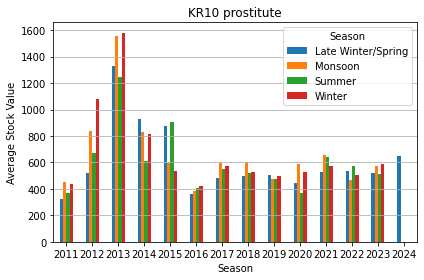

In [50]:
plt.figure(figsize=(8, 6))
seasonal_data.plot(kind='bar')
plt.title('KR10')
plt.xlabel('Season')
plt.ylabel('Average Stock Value')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1152x864 with 0 Axes>

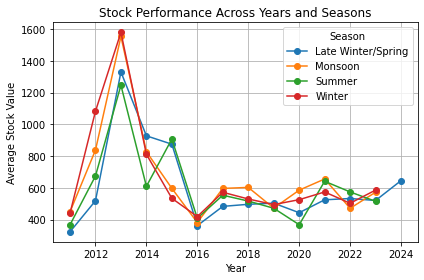

In [48]:
agri_data_df['Year'] = agri_data_df['DATE'].dt.year
plt.figure(figsize=(16, 12))
seasonal_data.plot(kind='line', marker='o')
plt.title('Stock Performance Across Years and Seasons')
plt.xlabel('Year')
plt.ylabel('Average Stock Value')
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()